Loan prediction contest on Analytics Vidhya.

train set = 
       Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
526  LP002705   Male     Yes  ...            1.0     Semiurban           Y
313  LP002008   Male     Yes  ...            NaN         Rural           Y
199  LP001673   Male      No  ...            1.0         Urban           N
181  LP001634   Male      No  ...            NaN         Rural           N
488  LP002555   Male     Yes  ...            1.0     Semiurban           Y

[5 rows x 13 columns] 



train_X = (614, 11)
train_Y = (614,)
test_X = (367, 11)


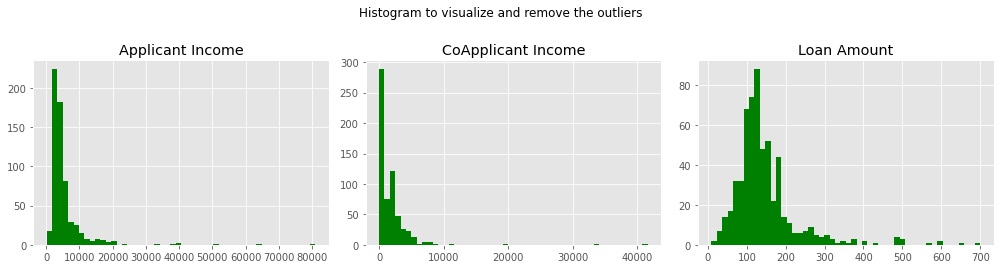

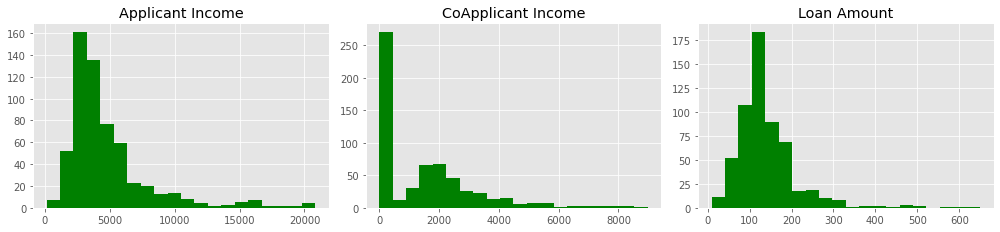

train_X = (600, 11)
train_Y = (600,) 



Epoch 1/2000
2/2 [==============================] - 0s 7ms/step - loss: 0.6945 - accuracy: 0.4304
Epoch 2/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.6105 - accuracy: 0.6967
Epoch 3/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5880 - accuracy: 0.6864
Epoch 4/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.5665 - accuracy: 0.6929
Epoch 5/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.5556 - accuracy: 0.6935
Epoch 6/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.5440 - accuracy: 0.7079
Epoch 7/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5393 - accuracy: 0.7720
Epoch 8/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.5231 - accuracy: 0.7812
Epoch 9/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5176 - accuracy: 0.8071
Epoch 10/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4

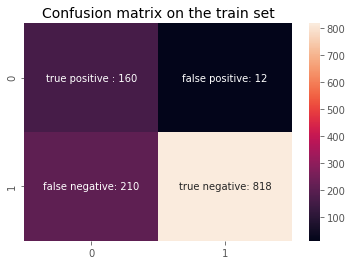

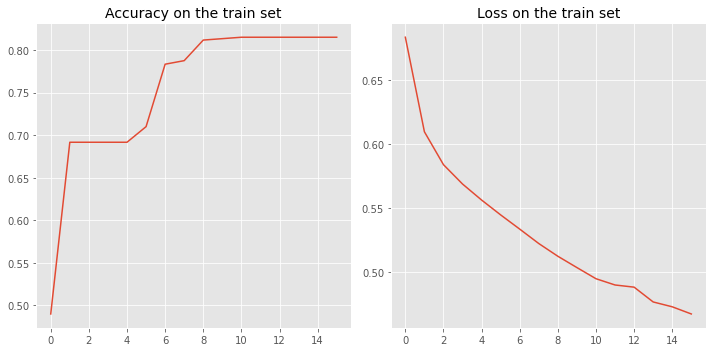

In [41]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
plt.style.use('ggplot')

# Read data
train = pd.read_csv('train.csv')
train = shuffle(train)
test_X = pd.read_csv('test.csv')
print('train set = \n', train.head(), '\n'*3)

# Prepare the train and test set
train.pop('Loan_ID')
train_X = train
loan_id = test_X.pop('Loan_ID')
train_Y = train.pop('Loan_Status')
print('train_X =', train_X.shape)
print('train_Y =', train_Y.shape)
print('test_X =', test_X.shape)

# Histogram to check for outliers
plt.figure(figsize=(14,9))
plt.subplot(331)
train_X['ApplicantIncome'].hist(bins=50, color='green')
plt.title('Applicant Income')
plt.tight_layout()
plt.subplot(332)
train_X['CoapplicantIncome'].hist(bins=50, color='green')
plt.title('CoApplicant Income')
plt.subplot(333)
train_X['LoanAmount'].hist(bins=50, color='green')
plt.title('Loan Amount')
plt.tight_layout()
plt.suptitle('Histogram to visualize and remove the outliers', fontsize=12, y=1.04)
plt.show()


# Reomve outliers from the train set using proper percentiles
for column in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
  if column == 'LoanAmount':
    th1, th2 = np.percentile(train_X[column],[10,90])
    iqr = th2 - th1
    lower_bound = th1 -(1.5 * iqr) 
    upper_bound = th2 +(1.5 * iqr)
    indeces= train_X[(train_X[column] > upper_bound) | (train_X[column] < lower_bound) ].index
    train_X.drop(indeces, inplace=True)
    train_Y.drop(indeces, inplace=True)
  else:
    th1, th2 = np.percentile(train_X[column],[0,90])
    iqr = th2 - th1
    lower_bound = th1 -(1.5 * iqr) 
    upper_bound = th2 +(1.5 * iqr)
    indeces= train_X[(train_X[column] > upper_bound) | (train_X[column] < lower_bound) ].index
    train_X.drop(indeces, inplace=True)
    train_Y.drop(indeces, inplace=True)

plt.figure(figsize=(14,9))
plt.subplot(331)
train_X['ApplicantIncome'].hist(bins=20, color='green')
plt.title('Applicant Income')
plt.tight_layout()
plt.subplot(332)
train_X['CoapplicantIncome'].hist(bins=20, color='green')
plt.title('CoApplicant Income')
plt.subplot(333)
train_X['LoanAmount'].hist(bins=20, color='green')
plt.title('Loan Amount')
plt.tight_layout()
plt.show()  

print('train_X =', train_X.shape)
print('train_Y =', train_Y.shape, '\n'*3)


# Convert all values to numerical values
# One-hot encoding
train_X = pd.get_dummies(train_X, columns=["Gender","Married"])
test_X = pd.get_dummies(test_X, columns=["Gender","Married"])

# Frequency encoding
# pa = train_X.groupby('Property_Area').size()/len(train_X)
# dep = train_X.groupby('Dependents').size()/len(train_X)
# edu = train_X.groupby('Education').size()/len(train_X)
# emp = train_X.groupby('Self_Employed').size()/len(train_X)
# train_X['Property_Area'] = train_X['Property_Area'].map(pa)
# train_X['Dependents'] = train_X['Dependents'].map(dep)
# train_X['Education'] = train_X['Education'].map(edu)
# train_X['Self_Employed'] = train_X['Self_Employed'].map(emp)
# test_X['Property_Area'] = test_X['Property_Area'].map(pa)
# test_X['Dependents'] = test_X['Dependents'].map(dep)
# test_X['Education'] = test_X['Education'].map(edu)
# test_X['Self_Employed'] = test_X['Self_Employed'].map(emp)

# Label and oridinal encoding
train_X['Property_Area'] = [2.0 if x=='Urban' else 1.0 if x=='Semiurban'
                             else 0.0 for x in train_X['Property_Area']]  
test_X['Property_Area'] = [2.0 if x=='Urban' else 1.0 if x=='Semiurban'
                             else 0.0 for x in test_X['Property_Area']] 
train_X['Dependents'] = [0.0 if x=='0' else 1.0 if x=='1' else 2.0 if x=='2'
                    else 3 for x in train_X['Dependents']]    
test_X['Dependents'] = [0.0 if x=='0' else 1.0 if x=='1' else 2.0 if x=='2'
                    else 3 for x in test_X['Dependents']] 
train_X['Education'] = [1.0 if x=='Graduate' else 0.0 for x in train_X['Education']]
train_X['Self_Employed'] = [1.0 if x=='Yes' else 0.0 for x in train_X['Self_Employed']]
test_X['Education'] = [1.0 if x=='Graduate' else 0.0 for x in test_X['Education']]
test_X['Self_Employed'] = [1.0 if x=='Yes' else 0.0 for x in test_X['Self_Employed']]
train_Y = [1.0 if x=='Y' else 0.0 for x in train_Y]


"""Fill missing values"""
# ffill method
# train_X['Loan_Amount_Term'].fillna(method='bfill', inplace=True)
# test_X['Loan_Amount_Term'].fillna(method='bfill', inplace=True)

# train_X['Credit_History'].fillna(method='bfill', inplace=True)
# test_X['Credit_History'].fillna(method='bfill', inplace=True)

# train_X['LoanAmount'].fillna(method='bfill', inplace=True)
# test_X['LoanAmount'].fillna(method='bfill', inplace=True)

# impute with mean, mode or median
train_X['Loan_Amount_Term'].fillna(train_X['Loan_Amount_Term'].mode()[0], inplace=True)
test_X['Loan_Amount_Term'].fillna(train_X['Loan_Amount_Term'].mode()[0], inplace=True)

train_X['Credit_History'].fillna(train_X['Credit_History'].mode()[0], inplace=True)
test_X['Credit_History'].fillna(train_X['Credit_History'].mode()[0], inplace=True)

train_X['LoanAmount'].fillna(train_X['LoanAmount'].median(), inplace=True)
test_X['LoanAmount'].fillna(train_X['LoanAmount'].median(), inplace=True)


# Add data
train_X = pd.concat([train_X, train_X[::-1]], ignore_index=True)
train_Y = train_Y + train_Y[::-1]


# Normalize data
scaler = MinMaxScaler()
df = pd.concat([train_X, test_X], ignore_index=True)
df = scaler.fit_transform(df)
m = train_X.shape[0]
train_X = df[:m]
test_X = df[m:]
train_Y = np.asarray(train_Y, dtype='float64')


# Build the model
def build_model():
  adam = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
  callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

  inputs = Input(shape=(13,), name='input_layer')
  x = Dense(units=128, activation='relu')(inputs)
  x = Dense(units=128, activation='relu')(x)
  x = Dense(units=1, name='Output', activation='sigmoid')(x)
  model =  Model(inputs=inputs, outputs=x)

  model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics='accuracy')
  history = model.fit(train_X, train_Y, batch_size=614,
                      epochs=2000, verbose=1, callbacks=[callback])
  return [model, history]

[model, history] = build_model()
predictions = model.predict(test_X)
pred = ['Y' if x>=0.5 else 'N' for x in predictions]
pred_dic = list(zip(loan_id, pred))
pred_df = pd.DataFrame(pred_dic, columns=['Loan_ID', 'Loan_Status'])
pred_df.to_csv ('predict.csv', index = False, header=True)

# Confusion matrix on the train set
train_pred = model.predict(train_X)
train_pred = [1 if x >=0.5 else 0 for x in train_pred]
CM = confusion_matrix(train_pred, train_Y)
labels = np.array(['true positive : %i' %CM[0][0] , 'false positive: %i' %CM[0][1],
                  'false negative: %i'%CM[1][0], 'true negative: %i'%CM[1][1]])
labels = labels.reshape((2,2))
sns.heatmap(CM, annot=labels, cmap=None, fmt='');
plt.title('Confusion matrix on the train set', fontsize=14)
plt.show()

# Accuracy and loss plots
results = history.history
epochs = len(history.history['loss'])
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(np.arange(epochs), results['accuracy'])
plt.title('Accuracy on the train set', fontsize=14)
plt.subplot(122)
plt.plot(np.arange(epochs), results['loss'])
plt.title('Loss on the train set', fontsize=14)
plt.tight_layout()
plt.show()